In [1]:
import numpy as np
import matplotlib.pyplot as plt  #画图
from sklearn.datasets import make_blobs  #从sklearn中直接生成聚类数据

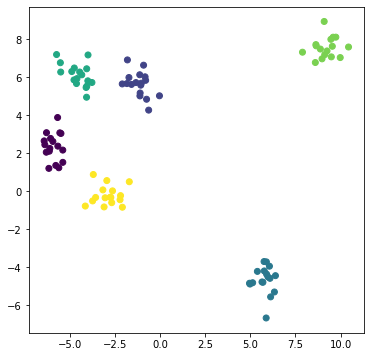

In [2]:
#n_samples样本点的个数，centers中心点的个数，random_state随机种子，cluster_std聚类的标准差（随机分布的偏差大小）
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)   
plt.figure(figsize = (6, 6)) #设置图的大小
plt.scatter(x[:,0], x[:,1], c=y)  #x[:,0]即x中的第一列，x[:,1]即x中的第二列。c=y即y取不同值时颜色不同
plt.show()

In [3]:
#引入scipy中的距离函数，默认欧式距离
from scipy.spatial.distance import cdist

class K_Means(object):
    #初始化，参数n_clusters(即聚成几类，K)、max_iter（迭代次数）、centroids（初始质心）
    def __init__(self, n_clusters=6, max_iter=300, centroids=[]):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=np.array(centroids, dtype=float)  #数组转换为矩阵
    
    #训练模型方法，K-Means聚类过程，传入原始数据
    def fit(self, data):
        #假如没有指定初始质心，就随机选取data中的点作为初始质心（即x，x就包含了一个点的两个坐标）
        if self.centroids.shape==(0,):  #0行矩阵
            #从data中随机生成0-data行数的6个整数作为索引值
            #random.randint(a,b,c)方法随机生成一个整数，从a到b，生成c个
            #data.shape[0]为data行数，生成self.n_clusters个即6个
            self.centroids=data[np.random.randint(0, data.shape[0], self.n_clusters), :]
            
        #开始迭代
        for i in range(self.max_iter):
            #1.计算距离矩阵，得到的是一个100*6的矩阵
            #每一行代表一个样本点到所有质心的距离，一行里六个值分别指到第几个质心的距离
            distances=cdist(data, self.centroids)   #两个数组对象使用cdist计算欧式距离，要求它们维度一致
            
            #2.对距离按由近到远排序，选取最近的质心点的类别作为当前点的分类
            c_index=np.argmin(distances, axis=1)  #axis=1每一行取最小值，最后结果保存为一列（100*1的矩阵）
            
            #3.对每一类数据进行均值计算，更新质心点坐标
            for i in range(self.n_clusters):
                #首先排除掉没有出现在c_index里的类别（即所有的点都没有离这个质心最近）
                if i in c_index:  #i为0-5
                    #选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    #c_index==i逻辑判断表达式，结果为布尔类型（数组）
                    #c_index为一个数组，data[c_index==i]返回结果为true对应的data的值，即类别为i的值的坐标
                    self.centroids[i]=np.mean(data[c_index==i], axis=0)  #布尔索引。axis=0得到一行的数据，将每一列做均值计算，列数不变
                    
    #实现预测方法
    def predict(self, samples):  #samples一组样本点（新来的测试数据）
        #跟上面一样，先计算距离矩阵，然后选取距离最近的那个质心的类别
        distances=cdist(samples, self.centroids)
        c_index=np.argmin(distances, axis=1)
        return c_index

In [4]:
#定义一个绘制子图函数
def plotKMeans(x, y, centroids, subplot, title):    #x,y为样本点坐标；centroids为质心点；subplot子图编号
    #分配子图
    plt.subplot(subplot) #根据传进来的子图编号分配子图
    plt.scatter(x[:,0], x[:,1], c='r')
    #画出质心点。c=np.array(range(6))按照不同颜色生成初始质心点，s指size
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(6)), s=100)  
    plt.title(title)

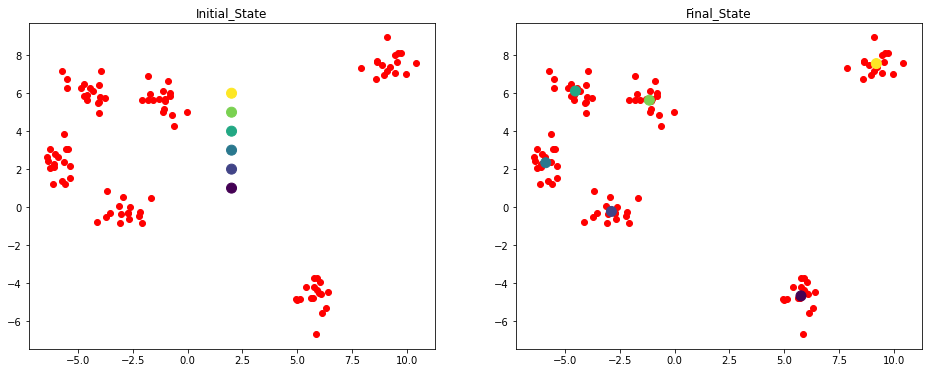

In [5]:
#创建一个kmeans对象实例
kmeans=K_Means(max_iter=300, centroids=np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]])) #6个初始质心点
plt.figure(figsize=(16,6))
plotKMeans(x, y, kmeans.centroids, 121, 'Initial_State')  #121表示一行两列的子图中的第一个

#开始聚类
kmeans.fit(x)
plotKMeans(x, y, kmeans.centroids, 122, 'Final_State')

[[ 5.76444812 -4.67941789]
 [-2.89174024 -0.22808556]
 [-5.89115978  2.33887408]
 [-4.53406813  6.11523454]
 [-1.15698106  5.63230377]
 [ 9.20551979  7.56124841]]
[1 5]


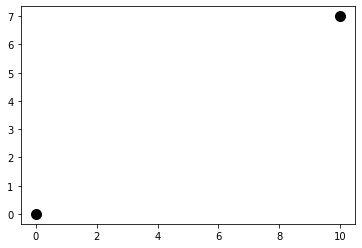

In [6]:
#预测新数据点的类别
x_new=np.array([[0,0], [10,7]])  #二维数组
y_pred=kmeans.predict(x_new)
print(kmeans.centroids)
print(y_pred)
plt.scatter(x_new[:,0], x_new[:,1], s=100, c='black')

### 博客：https://zhuanlan.zhihu.com/p/363003943